{'A': {'B': 4, 'D': 2}, 'B': {'A': 4, 'C': 2, 'E': 6}, 'D': {'A': 2, 'E': 5, 'G': 3}, 'C': {'B': 2, 'F': 1}, 'E': {'B': 6, 'D': 5, 'F': 7}, 'F': {'C': 1, 'E': 7, 'H': 2, 'I': 10}, 'G': {'D': 3, 'H': 4}, 'H': {'F': 2, 'G': 4, 'I': 2}, 'I': {'H': 2, 'F': 10}}


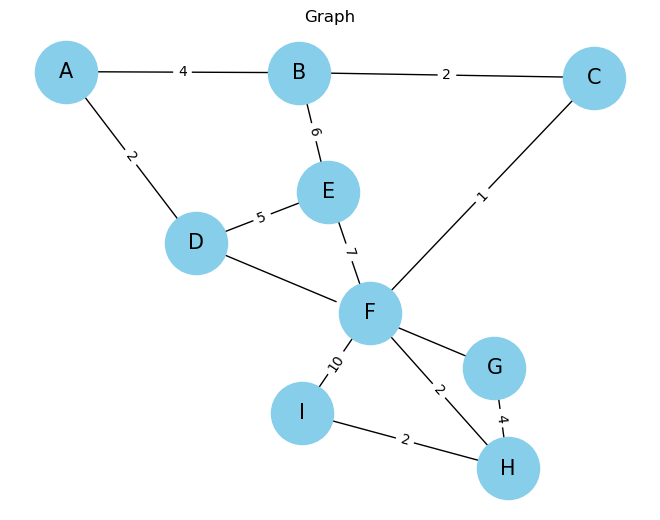

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import time
import pandas as pd
from collections import deque

# Create a sample graph
G = nx.Graph()

# Add nodes and edges with weights
edges = [
    ('A', 'B', 4), ('A', 'D', 2), ('B', 'C', 2), ('B', 'E', 6),
    ('C', 'F', 1), ('D', 'E', 5), ('D', 'G', 3), ('E', 'F', 7),
    ('F', 'H', 2), ('G', 'H', 4), ('H', 'I', 2), ('F', 'I', 10)
]
G.add_weighted_edges_from(edges)

# Convert graph to adjacency dictionary
graph_dict = {node: {neighbor: data['weight'] for neighbor, data in G[node].items()} for node in G.nodes}

print(graph_dict)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graph")
plt.show()

In [2]:
# Dijkstra's algorithm
def dijkstra(graph, start, goal):
    pq = [(0, start, [])]  # (cost, current_node, path)
    visited = set()
    while pq:
        (cost, node, path) = heapq.heappop(pq)
        if node in visited:
            continue
        visited.add(node)
        path = path + [node]
        if node == goal:
            return cost, path
        for neighbor, weight in graph.get(node, {}).items():
            if neighbor not in visited:
                heapq.heappush(pq, (cost + weight, neighbor, path))
    return float("inf"), []

# A* algorithm
def heuristic(a, b):
    return 0  # For simplicity, we'll use 0 (Dijkstra's equivalent)

def astar(graph, start, goal):
    pq = [(0, start, [])]  # (f_cost, current_node, path)
    visited = set()
    g_costs = {start: 0}
    while pq:
        (f_cost, node, path) = heapq.heappop(pq)
        if node in visited:
            continue
        visited.add(node)
        path = path + [node]
        if node == goal:
            return f_cost, path
        for neighbor, weight in graph.get(node, {}).items():
            g_cost = g_costs[node] + weight
            if neighbor not in visited or g_cost < g_costs.get(neighbor, float("inf")):
                g_costs[neighbor] = g_cost
                f_cost = g_cost + heuristic(neighbor, goal)
                heapq.heappush(pq, (f_cost, neighbor, path))
    return float("inf"), []

def bfs(graph, start, goal):
    pq = [(0, start, [])]  # (accumulated_cost, current_node, path)
    visited = set()

    while pq:
        cost, node, path = heapq.heappop(pq)
        if node in visited:
            continue
        visited.add(node)
        path = path + [node]
        if node == goal:
            return cost, path
        for neighbor, weight in graph.get(node, {}).items():
            if neighbor not in visited:
                heapq.heappush(pq, (cost + weight, neighbor, path))

    return float("inf"), []
    
def dfs(graph, start, goal):
    pq = [(0, start, [])]  # (accumulated_cost, current_node, path)
    visited = set()

    while pq:
        cost, node, path = heapq.heappop(pq)
        if node in visited:
            continue
        visited.add(node)
        path = path + [node]
        if node == goal:
            return cost, path
        for neighbor, weight in graph.get(node, {}).items():
            if neighbor not in visited:
                heapq.heappush(pq, (cost + weight, neighbor, path))

    return float("inf"), []

# Uniform Cost Search (UCS)
def uniform_cost_search(graph, start, goal):
    pq = [(0, start, [])]  # (cost, current_node, path)
    visited = set()
    while pq:
        (cost, node, path) = heapq.heappop(pq)
        if node in visited:
            continue
        visited.add(node)
        path = path + [node]
        if node == goal:
            return cost, path
        for neighbor, weight in graph.get(node, {}).items():
            if neighbor not in visited:
                heapq.heappush(pq, (cost + weight, neighbor, path))
    return float("inf"), []

In [3]:
# Test the algorithms
start_node = 'A'
goal_node = 'I'

# Dijkstra
start_time = time.perf_counter()
dijkstra_cost, dijkstra_path = dijkstra(graph_dict, start_node, goal_node)
dijkstra_time = (time.perf_counter() - start_time) * 1e6 

# A*
start_time = time.perf_counter()
astar_cost, astar_path = astar(graph_dict, start_node, goal_node)
astar_time = (time.perf_counter() - start_time) * 1e6 

# BFS
start_time = time.perf_counter()
bfs_cost, bfs_path = bfs(graph_dict, start_node, goal_node)
bfs_time = (time.perf_counter() - start_time) * 1e6 

# DFS
start_time = time.perf_counter()
dfs_cost, dfs_path = dfs(graph_dict, start_node, goal_node)
dfs_time = (time.perf_counter() - start_time) * 1e6

# UCS
start_time = time.perf_counter()
ucs_cost, ucs_path = uniform_cost_search(graph_dict, start_node, goal_node)
ucs_time = (time.perf_counter() - start_time) * 1e6

In [4]:
# Display results
print("Dijkstra's Algorithm:")
print("Cost:", dijkstra_cost)
print("Path:", " -> ".join(dijkstra_path))
print("Time taken:", dijkstra_time, "seconds\n")

Dijkstra's Algorithm:
Cost: 11
Path: A -> B -> C -> F -> H -> I
Time taken: 261.8000144138932 seconds



In [5]:
print("A* Algorithm:")
print("Cost:", astar_cost)
print("Path:", " -> ".join(astar_path))
print("Time taken:", astar_time, "seconds\n")

A* Algorithm:
Cost: 21
Path: A -> D -> G -> H -> I
Time taken: 242.00009647756815 seconds



In [6]:
print("BFS Algorithm:")
print("Cost:", dfs_cost)
print("Path:", " -> ".join(dfs_path))
print("Time taken:", dfs_time, "seconds\n")

BFS Algorithm:
Cost: 11
Path: A -> B -> C -> F -> H -> I
Time taken: 4070.900031365454 seconds



In [7]:
print("DFS Algorithm:")
print("Cost:", dfs_cost)
print("Path:", " -> ".join(dfs_path))
print("Time taken:", dfs_time, "seconds\n")

DFS Algorithm:
Cost: 11
Path: A -> B -> C -> F -> H -> I
Time taken: 4070.900031365454 seconds



In [8]:
print("UCS Algorithm:")
print("Cost:", ucs_cost)
print("Path:", " -> ".join(ucs_path))
print("Time taken:", ucs_time, "seconds\n")

UCS Algorithm:
Cost: 11
Path: A -> B -> C -> F -> H -> I
Time taken: 338.8000186532736 seconds



Optimal Algorithm: Dijkstra
Cost: 11
Path: A -> B -> C -> F -> H -> I


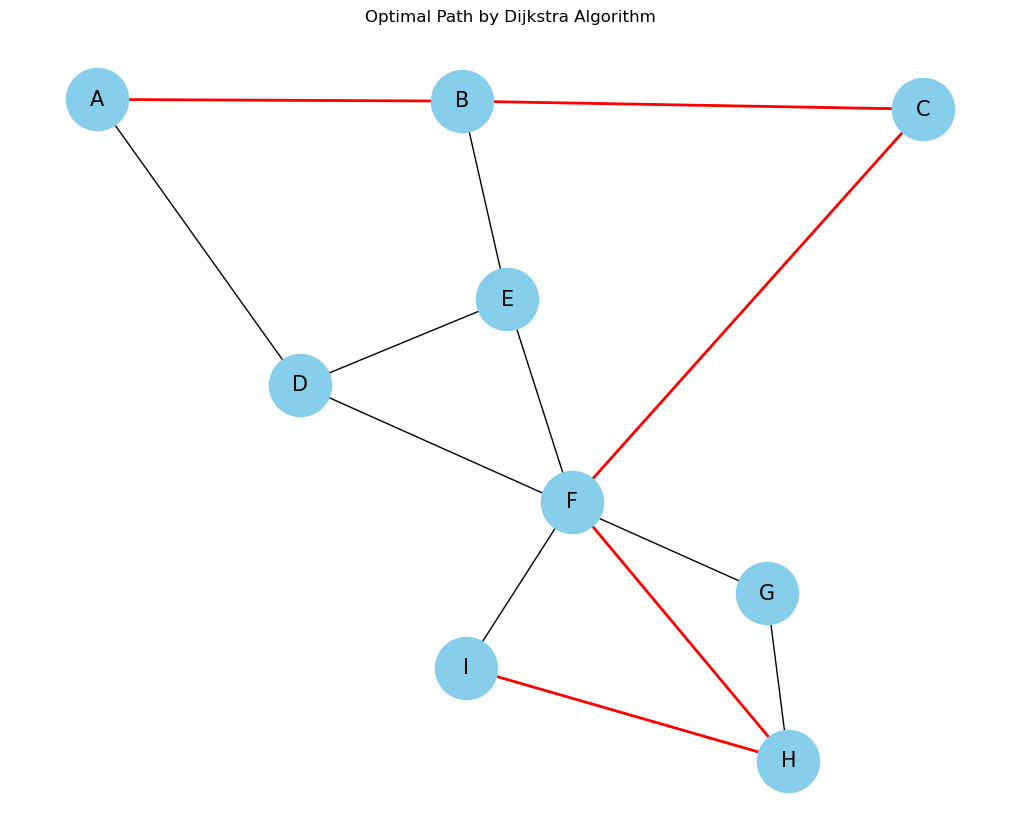

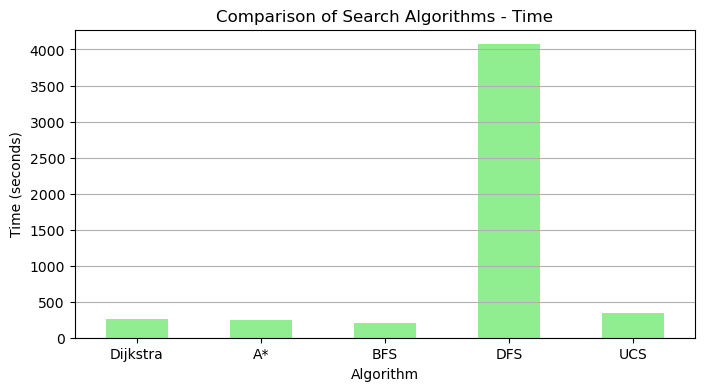

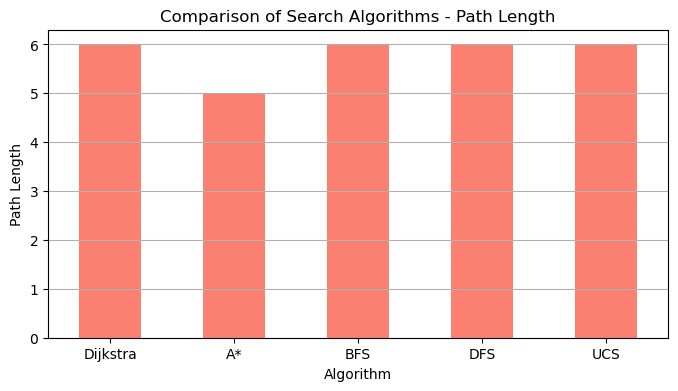

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data
costs = {
    'Dijkstra': (dijkstra_cost, dijkstra_path),
    'A*': (astar_cost, astar_path),
    'BFS': (bfs_cost, bfs_path),
    'DFS': (dfs_cost, dfs_path),
    'UCS': (ucs_cost, ucs_path)
}

# Find the optimal algorithm
optimal_algo = min(costs, key=lambda x: costs[x][0])
optimal_cost, optimal_path = costs[optimal_algo]

# Display results
print(f"Optimal Algorithm: {optimal_algo}")
print("Cost:", optimal_cost)
print("Path:", " -> ".join(optimal_path))

# Ensure the node labels in the path match those in the graph
optimal_edges = [(optimal_path[i], optimal_path[i+1]) for i in range(len(optimal_path)-1) if optimal_path[i] in G.nodes and optimal_path[i+1] in G.nodes]

# Visualize the optimal path on the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15)
nx.draw_networkx_edges(G, pos, edgelist=optimal_edges, edge_color='r', width=2)
plt.title(f"Optimal Path by {optimal_algo} Algorithm")
plt.show()

# Save the comparison results as a DataFrame
comparison_data = {
    'Algorithm': ['Dijkstra', 'A*', 'BFS', 'DFS', 'UCS'],
    'Cost': [dijkstra_cost, astar_cost, bfs_cost, dfs_cost, ucs_cost],
    'Time (seconds)': [dijkstra_time, astar_time, bfs_time, dfs_time, ucs_time],
    'Path Length': [len(dijkstra_path), len(astar_path), len(bfs_path), len(dfs_path), len(ucs_path)]
}

df = pd.DataFrame(comparison_data)
df.set_index('Algorithm', inplace=True)

# Plotting the time
plt.figure(figsize=(8, 4))
df['Time (seconds)'].plot(kind='bar', color='lightgreen')
plt.title("Comparison of Search Algorithms - Time")
plt.ylabel("Time (seconds)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Plotting the path length
plt.figure(figsize=(8, 4))
df['Path Length'].plot(kind='bar', color='salmon')
plt.title("Comparison of Search Algorithms - Path Length")
plt.ylabel("Path Length")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()